In [0]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [0]:
bae_uri = "https://gist.githubusercontent.com/alti-tude/710cb9d4dfc7ebcd0afb9cf93d8f6a8d/raw/574730ba009e69b81d6c79f2fef2c3dd5145db0a/"

In [0]:
c = pd.read_csv(base_uri + "purchases.csv", index_col=0)
c

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [0]:
movie = pd.read_csv(base_uri + "IMDB-Movie-Data.csv", index_col=0)
movie.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [0]:
data = pd.read_csv(base_uri + "MusicTop50.csv", index_col=0)

In [0]:
data.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability..db..,Loudness..,Liveness.,Valence (),Length,Acousticness,Speechiness,Popularity
1,Se�orita,Shawn Mendes,canadian pop,117.0,55.0,76,-6,8.0,75.0,191.0,4,3,79.0
2,China,Anuel AA,reggaeton flow,105.0,81.0,79,-4,8.0,61.0,302.0,8,9,92.0
3,boyfriend (with Social House),Ariana Grande,dance pop,190.0,80.0,40,-4,16.0,70.0,186.0,12,46,85.0
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93.0,65.0,64,-8,8.0,55.0,198.0,12,19,86.0
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,NaN,65.0,58,-4,11.0,18.0,175.0,45,7,94.0


In [0]:
data.tail()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability..db..,Loudness..,Liveness.,Valence (),Length,Acousticness,Speechiness,Popularity
46,One Thing Right,Marshmello,brostep,88.0,62.0,66,-2,NaN,44.0,182.0,7,5,88.0
47,Te Robar�,Nicky Jam,latin,176.0,75.0,67,-4,8.0,80.0,202.0,24,6,88.0
48,Happier,Marshmello,brostep,100.0,79.0,69,-3,17.0,67.0,214.0,19,5,88.0
49,Call You Mine,The Chainsmokers,edm,104.0,70.0,59,-6,41.0,50.0,218.0,23,3,88.0
50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95.0,79.0,75,-6,7.0,61.0,206.0,21,12,82.0


In [0]:
data['Track.Name'] = data["Track.Name"].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
data['Artist.Name'] = data["Artist.Name"].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
data = data.fillna(data.mean())

In [0]:
data.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability..db..,Loudness..,Liveness.,Valence (),Length,Acousticness,Speechiness,Popularity
1,Se orita,Shawn Mendes,canadian pop,117.000000,55.0,76,-6,8.0,75.0,191.0,4,3,79.0
2,China,Anuel AA,reggaeton flow,105.000000,81.0,79,-4,8.0,61.0,302.0,8,9,92.0
3,boyfriend (with Social House),Ariana Grande,dance pop,190.000000,80.0,40,-4,16.0,70.0,186.0,12,46,85.0
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93.000000,65.0,64,-8,8.0,55.0,198.0,12,19,86.0
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,119.354167,65.0,58,-4,11.0,18.0,175.0,45,7,94.0


In [0]:
data.tail()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability..db..,Loudness..,Liveness.,Valence (),Length,Acousticness,Speechiness,Popularity
46,One Thing Right,Marshmello,brostep,88.0,62.0,66,-2,13.791667,44.0,182.0,7,5,88.0
47,Te Robar,Nicky Jam,latin,176.0,75.0,67,-4,8.000000,80.0,202.0,24,6,88.0
48,Happier,Marshmello,brostep,100.0,79.0,69,-3,17.000000,67.0,214.0,19,5,88.0
49,Call You Mine,The Chainsmokers,edm,104.0,70.0,59,-6,41.000000,50.0,218.0,23,3,88.0
50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95.0,79.0,75,-6,7.000000,61.0,206.0,21,12,82.0


In [0]:
ar = data[data.Popularity == data.Popularity.min()]['Artist.Name']
ar = dict(ar)
ar = [ ar[i] for i in ar ][0]
ar = data[data['Artist.Name'] == ar]
ar[ar["Loudness.."] == ar["Loudness.."].max()]["Track.Name"]

26    If I Can't Have You
Name: Track.Name, dtype: object

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

(512, 512, 3)
(137, 137, 3)
Number of channels is 4 = False


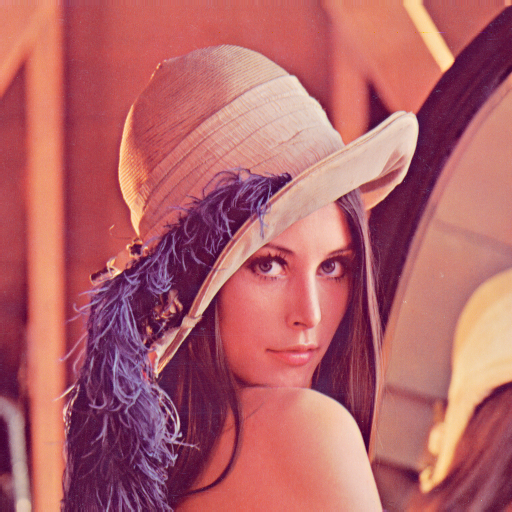

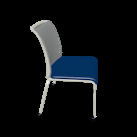

Mask


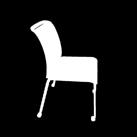

In [0]:
from skimage import io

url_path = "https://raw.githubusercontent.com/doltonfernandes/CVIT/master/Day2/Images/lena.png"    
url_path2 = "https://raw.githubusercontent.com/doltonfernandes/CVIT/master/Day2/Images/chair.png"
I = io.imread(url_path)
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
I3 = io.imread(url_path2)
I2 = cv2.cvtColor(I3, cv2.COLOR_BGR2RGB)
print (I.shape)
print (I2.shape)
print ("Number of channels is 4 =",I2.shape[2] == 4)
cv2_imshow(I)
cv2_imshow(I2)
print("Mask")
cv2_imshow(I3[:,:,3])

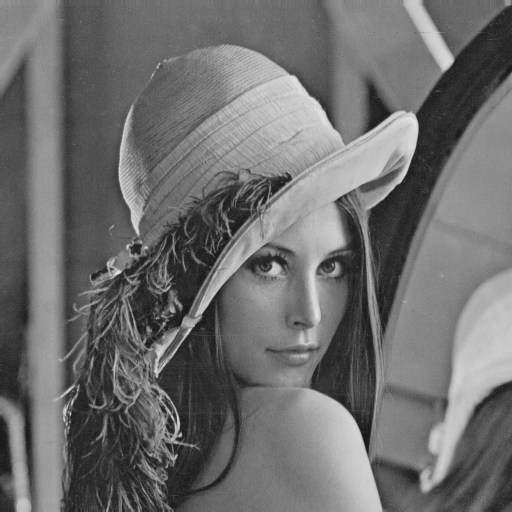

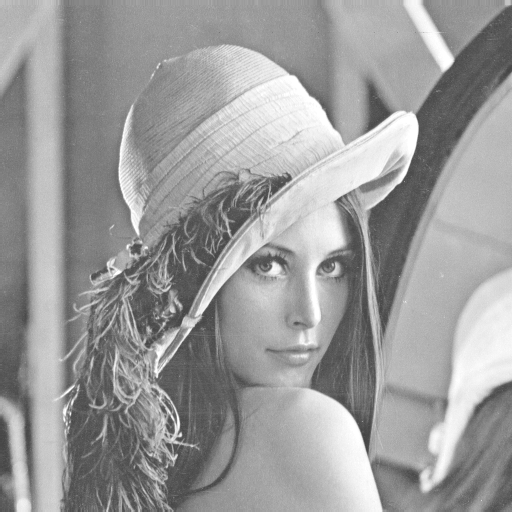

In [0]:
url_path = "https://raw.githubusercontent.com/doltonfernandes/CVIT/master/Day2/Images/lena.png"    
I = io.imread(url_path, cv2.IMREAD_GRAYSCALE)
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
cv2_imshow(I)
I = I.astype('int')
I += 45
I[I > 255] = 255
I = I.astype('uint8')
cv2_imshow(I)

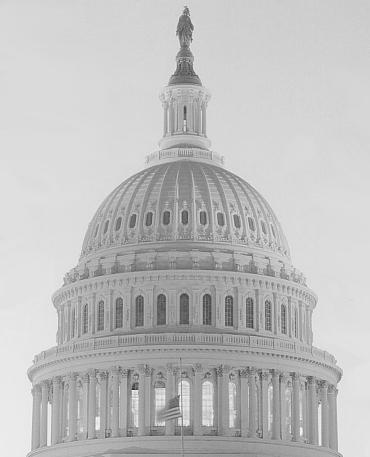

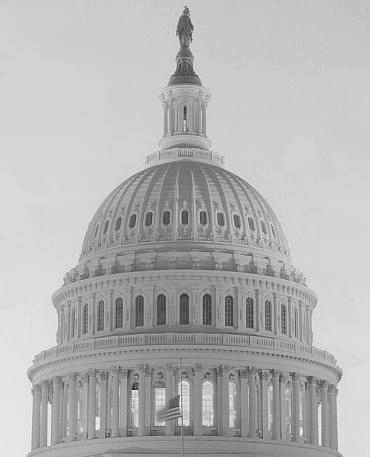

In [0]:
url_path = "https://raw.githubusercontent.com/doltonfernandes/CVIT/master/Day2/Images/gamma1.jpg"

gamma = 1.2

I = io.imread(url_path)
I = np.array(I)
cv2_imshow(I)
I = ((I/255)**gamma)*255
I = I.astype('uint8')
cv2_imshow(I)

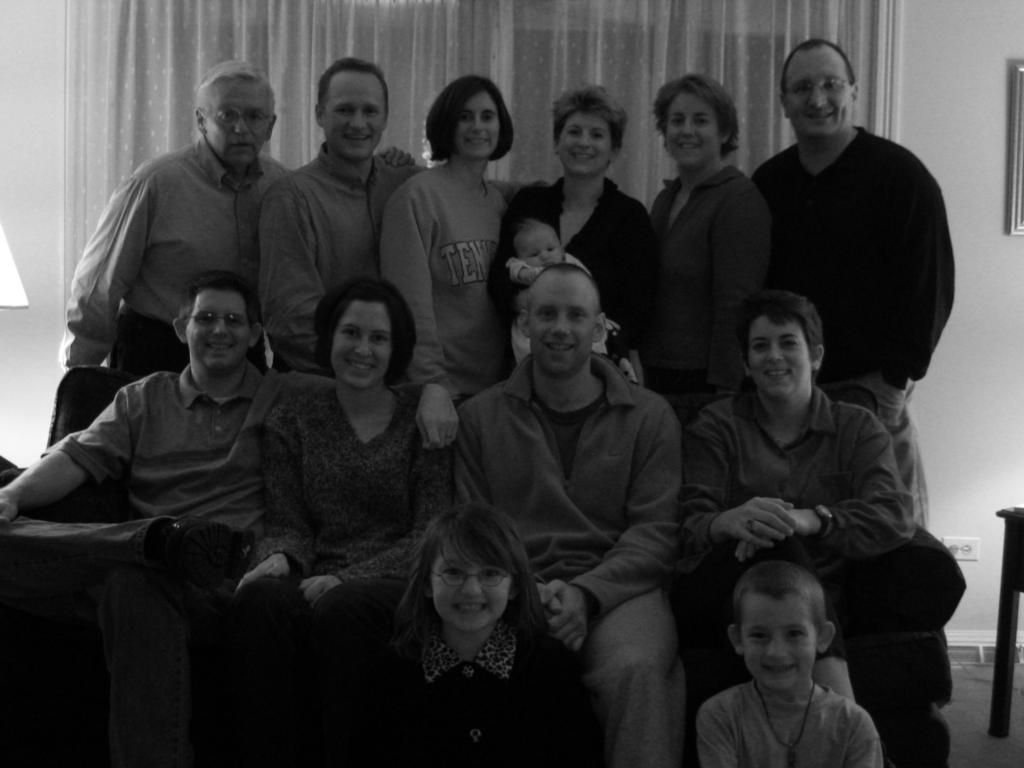

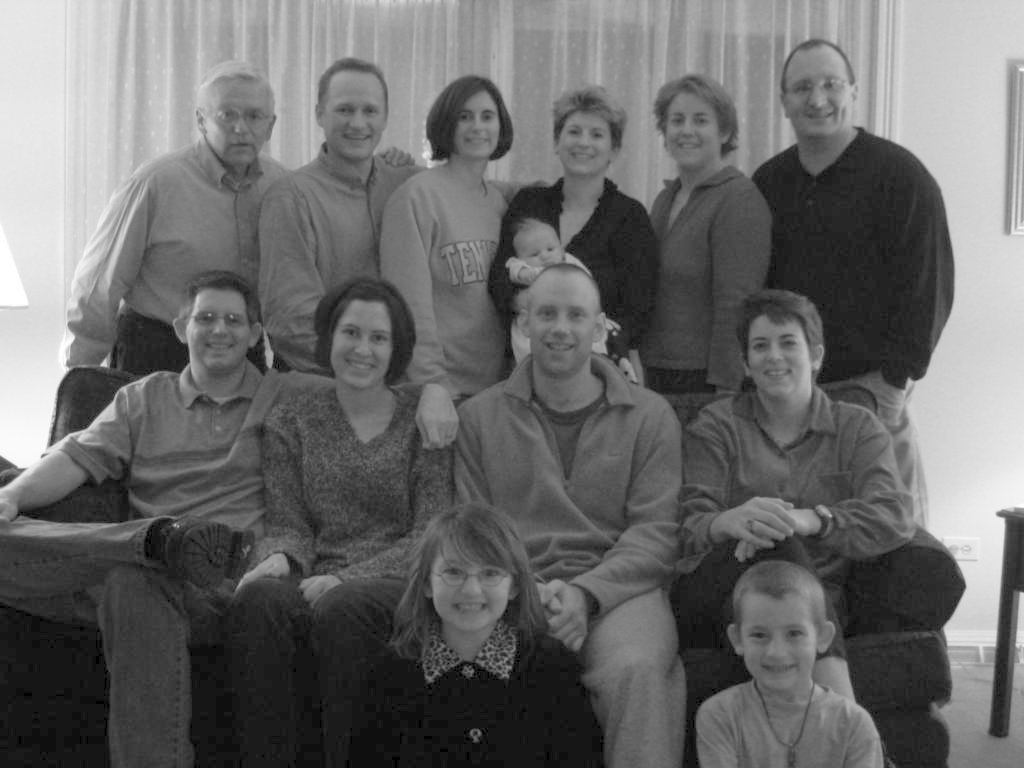

In [62]:
url_path = "https://raw.githubusercontent.com/doltonfernandes/CVIT/master/Day2/Images/gamma2.jpg"

gamma = 0.5

I = io.imread(url_path)
I = np.array(I)
cv2_imshow(I)
I = ((I/255)**gamma)*255
I = I.astype('uint8')
cv2_imshow(I)

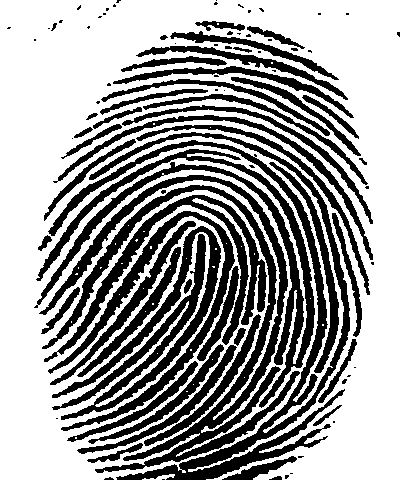

In [63]:
# Thresholding
url_path = "https://raw.githubusercontent.com/doltonfernandes/CVIT/master/Day2/Images/FingerPrint.jpg"    
I = io.imread(url_path, cv2.IMREAD_GRAYSCALE)

th = 128
I[I < th] = 0
I[I >= th] = 255
cv2_imshow(I)

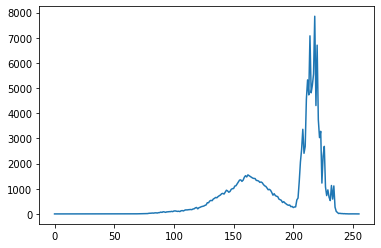

In [28]:
url_path = "https://raw.githubusercontent.com/doltonfernandes/CVIT/master/Day2/Images/gamma1.jpg"
I = io.imread(url_path, cv2.IMREAD_GRAYSCALE)

from matplotlib import pyplot as plt   
histr = cv2.calcHist([I],[0],None,[256],[0,256]) 
plt.plot(histr) 
plt.show() 

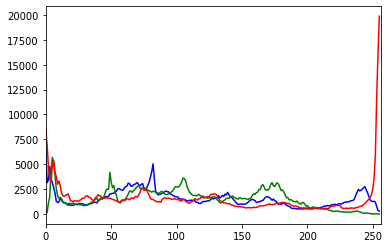

In [29]:
url_path = "https://raw.githubusercontent.com/doltonfernandes/CVIT/master/Day2/Images/lotus.jpg"
I = io.imread(url_path)
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([I],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

Sobel operator along x
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Sobel operator along y
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


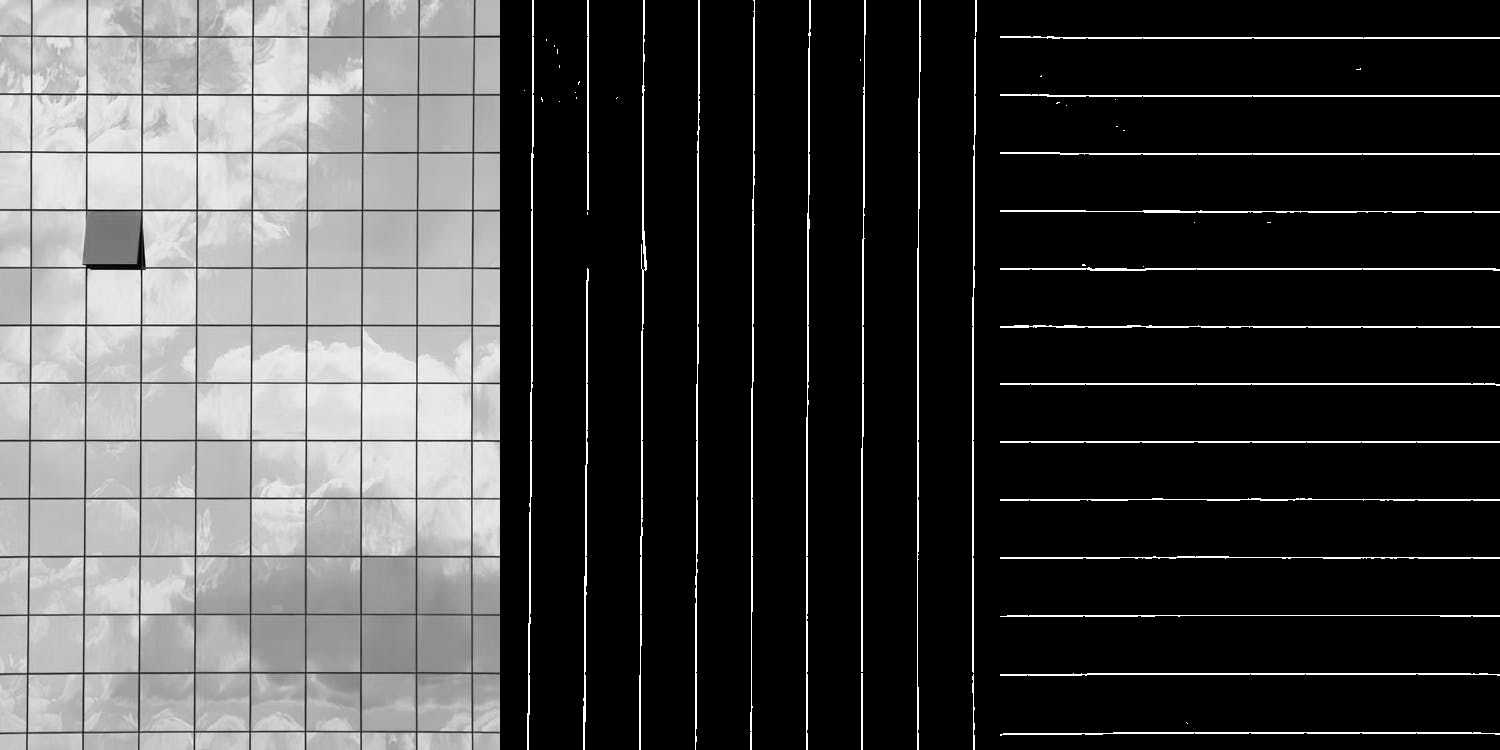

Horizontal Lines: 9 , Vertical Lines: 13
Number of Windows: 140


In [61]:
url_path = "https://raw.githubusercontent.com/doltonfernandes/CVIT/master/Day2/Images/window.jpeg"
I = io.imread(url_path, cv2.IMREAD_GRAYSCALE)
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
print ('Sobel operator along x')
print (sobel_x)
filtered_image1 = cv2.filter2D(I,-1,sobel_x)

sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
print ('Sobel operator along y')
print (sobel_y)
filtered_image2 = cv2.filter2D(I,-1,sobel_y)

magnitude = np.sqrt(np.square(filtered_image1.astype('int')) + np.square(filtered_image2.astype('int')))
final = np.clip((I + magnitude),0,255).astype('uint8')
th = 150
filtered_image1[filtered_image1 < th] = 0
filtered_image1[filtered_image1 >= th] = 255
filtered_image2[filtered_image2 < th] = 0
filtered_image2[filtered_image2 >= th] = 255
cv2_imshow(np.hstack([I,filtered_image1,filtered_image2]))

filtered_image1 = filtered_image1.sum(axis=0)
horizontal_lines = 0
f = 1
for i in filtered_image1:
  if f and i > 1e4:
    horizontal_lines += 1
    f = 0
  if i < 1e4 and not f:
    f = 1

filtered_image2 = filtered_image2.sum(axis=1)
vertical_lines = 0
f = 1
for i in filtered_image2:
  if f and i > 1e4:
    vertical_lines += 1
    f = 0
  if i < 1e4 and not f:
    f = 1

print("Horizontal Lines: " + str(horizontal_lines), ", Vertical Lines: " + str(vertical_lines))
print("Number of Windows: " + str((horizontal_lines+1)*(vertical_lines+1)))